#Handwritten Digit Recognition

We are going to uses MNIST dataset. This is probably one of the most popular datasets among machine learning and deep learning enthusiasts. The MNIST dataset contains 60,000 training images of handwritten digits from zero to nine and 10,000 images for testing. So, the MNIST dataset has 10 different classes. The handwritten digits images are represented as a 28×28 matrix where each cell contains grayscale pixel value.

###Installing libraries

In [ ]:
!pip install numpy tensorflow keras pillow

In [1]:
#Setting tensorflow GPU
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [99]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

###Loading the dataset

In [88]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

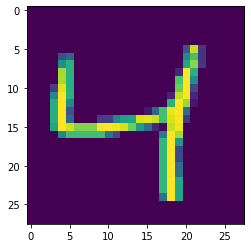

In [89]:
plt.imshow(x_train[2])

In [90]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


###Preprocessing the data

In [91]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [94]:
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

###Creating the Model

In [124]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [125]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_31 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_13 (Flatten)        (None, 9216)              0         
                                                                 
 dense_34 (Dense)            (None, 256)               2359552   
                                                     

In [126]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

###Training the model

In [127]:
hist = model.fit(x_train, y_train, 
                 batch_size = 128, 
                 epochs = 10,
                 verbose = 1,
                 validation_data = (x_test, y_test))

Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.7650 - accuracy: 0.9193 - val_loss: 0.0622 - val_accuracy: 0.9810
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1062 - accuracy: 0.9679 - val_loss: 0.0467 - val_accuracy: 0.9858
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0832 - accuracy: 0.9748 - val_loss: 0.0414 - val_accuracy: 0.9874
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0688 - accuracy: 0.9796 - val_loss: 0.0443 - val_accuracy: 0.9868
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0586 - accuracy: 0.9816 - val_loss: 0.0380 - val_accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0534 - accuracy: 0.9835 - val_loss: 0.0383 - val_accuracy: 0.9885
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0455 - accuracy: 0.9862 - val_loss: 0.0425 - val_accuracy: 0.9879

In [130]:
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5


###Evaluating the model

In [129]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03245222941040993
Test accuracy: 0.9898999929428101
